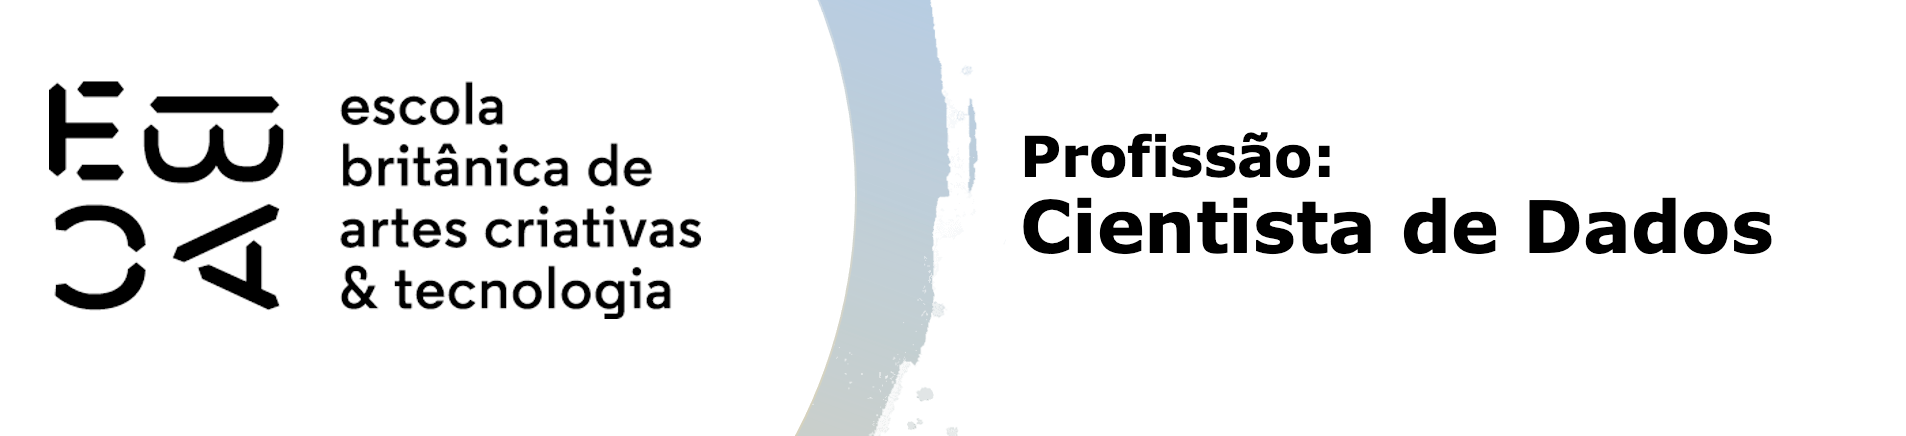

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [2]:
%%time
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

CPU times: total: 5.28 s
Wall time: 8.07 s


In [3]:
%%time
df = pd.read_csv('previsao_de_renda_II.csv')#.sample(10000)
df.head(3)

CPU times: total: 3.09 s
Wall time: 3.49 s


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66


In [4]:
print(f'Tamanho df: {df.shape}\nTotal de dados missings: {df.isna().sum().sum()} em {df.isna().sum().idxmax()}\n')
print(f'Depois do tratamento de dados faltantes:')
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())
df.isna().sum().sum()

Tamanho df: (750000, 14)
Total de dados missings: 125760 em tempo_emprego

Depois do tratamento de dados faltantes:


0

In [5]:
# Tratando data
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes_ref'] = df['data_ref'].dt.to_period('M')

In [6]:
df.shape

(750000, 15)

In [7]:
%%time
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(f"Tamanho da base de treino: {df_train.shape}")
print(f"Tamanho da base de teste: {df_test.shape}")

Tamanho da base de treino: (600000, 15)
Tamanho da base de teste: (150000, 15)
CPU times: total: 375 ms
Wall time: 425 ms


In [25]:
%%time
formula_log = 'np.log(renda) ~ ' + ' + '.join(df.columns.difference(['renda', 'data_ref', 'index', 'mes_ref']))
modelo_log = smf.ols(formula = formula_log, data = df_train).fit()

modelo_log.summary()

CPU times: total: 32.3 s
Wall time: 35.2 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.621e+04
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:38:36   Log-Likelihood:            -8.5137e+05
No. Observations:              600000   AIC:                         1.703e+06
Df Residuals:                  599975   BIC:                         1.703e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.3939      0.052    141.487      0.000       7.292       7.496
educacao[T.Médio]                    0.0579      0.012      4.715      0.000       0.034       0.082
educacao[T.Pós graduação]            0.1443      0.041      3.493      0.000       0.063       0.225
educacao[T.Superior completo]        0.0504      0.012      4.062      0.000       0.026       0.075
educacao[T.Superior incompleto]      0.0376      0.014      2.705      0.007       0.010       0.065
estado_civil[T.Separado]             0.1947      0.025      7.715      0.000       0.145       0.244
estado_civil[T.Solteiro]             0.1728      0.025      6.978      0.000       0.124       0.221
estado_civil[T.União]               -0.0006      0.005     -0.121      0.904      -0.010       0.009
estado_civil[T.Viúvo]                0.1697      0.026      6.651      0.000       0.120       0.220
posse_de_imovel[T.S]                 0.1877      0.003     66.166      0.000       0.182       0.193
posse_de_veiculo[T.S]                0.0155      0.003      5.332      0.000       0.010       0.021
sexo[T.M]                            0.1259      0.003     41.312      0.000       0.120       0.132
tipo_renda[T.Bolsista]              -0.1432      0.058     -2.483      0.013      -0.256      -0.030
tipo_renda[T.Empresário]             0.1520      0.003     46.459      0.000       0.146       0.158
tipo_renda[T.Pensionista]           -0.2923      0.005    -62.592      0.000      -0.301      -0.283
tipo_renda[T.Servidor público]       0.1443      0.005     29.966      0.000       0.135       0.154
tipo_residencia[T.Casa]             -0.0644      0.011     -5.820      0.000      -0.086      -0.043
tipo_residencia[T.Com os pais]      -0.0296      0.013     -2.357      0.018      -0.054      -0.005
tipo_residencia[T.Comunitário]      -0.1071      0.022     -4.786      0.000      -0.151      -0.063
tipo_residencia[T.Estúdio]          -0.1015      0.019     -5.426      0.000      -0.138      -0.065
tipo_residencia[T.Governamental]    -0.0820      0.013     -6.210      0.000      -0.108      -0.056
idade                                0.0035      0.000     20.681      0.000       0.003       0.004
qt_pessoas_residencia                0.1642      0.025      6.677      0.000       0.116       0.212
qtd_filhos                          -0.1598      0.025     -6.483      0.000      -0.208      -0.111
tempo_emprego                        0.1290      0.000    566.619      0.000       0.129       0.129
==============================================================================
Omnibus:                     3123.426   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2255.490
Skew:             

In [9]:
modelo_log.rsquared

0.39340462915306174

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

CPU times: total: 2.55 s
Wall time: 2.67 s


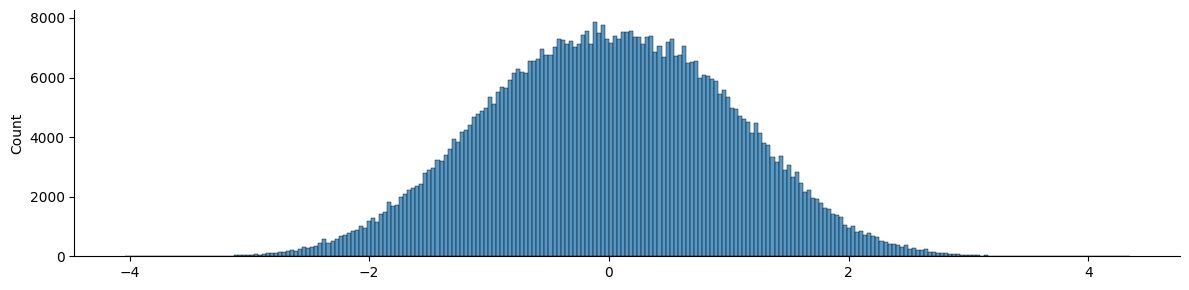

In [10]:
%%time
# distribuição Normal
sns.displot(modelo_log.resid, height=3, aspect=4);

CPU times: total: 1.61 s
Wall time: 1.69 s


<Axes: ylabel='None'>

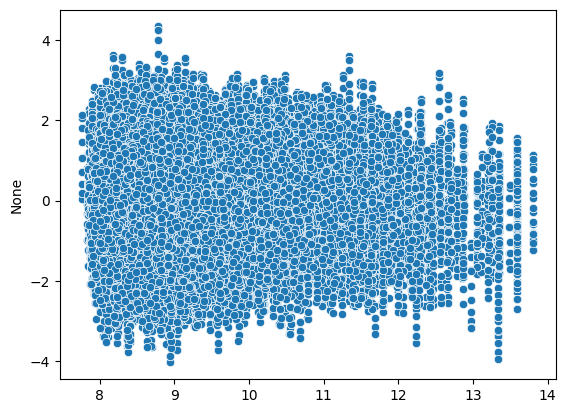

In [11]:
%%time
# gráfico dos resíduos versus os valores preditos
sns.scatterplot(x = modelo_log.predict(), y = modelo_log.resid)

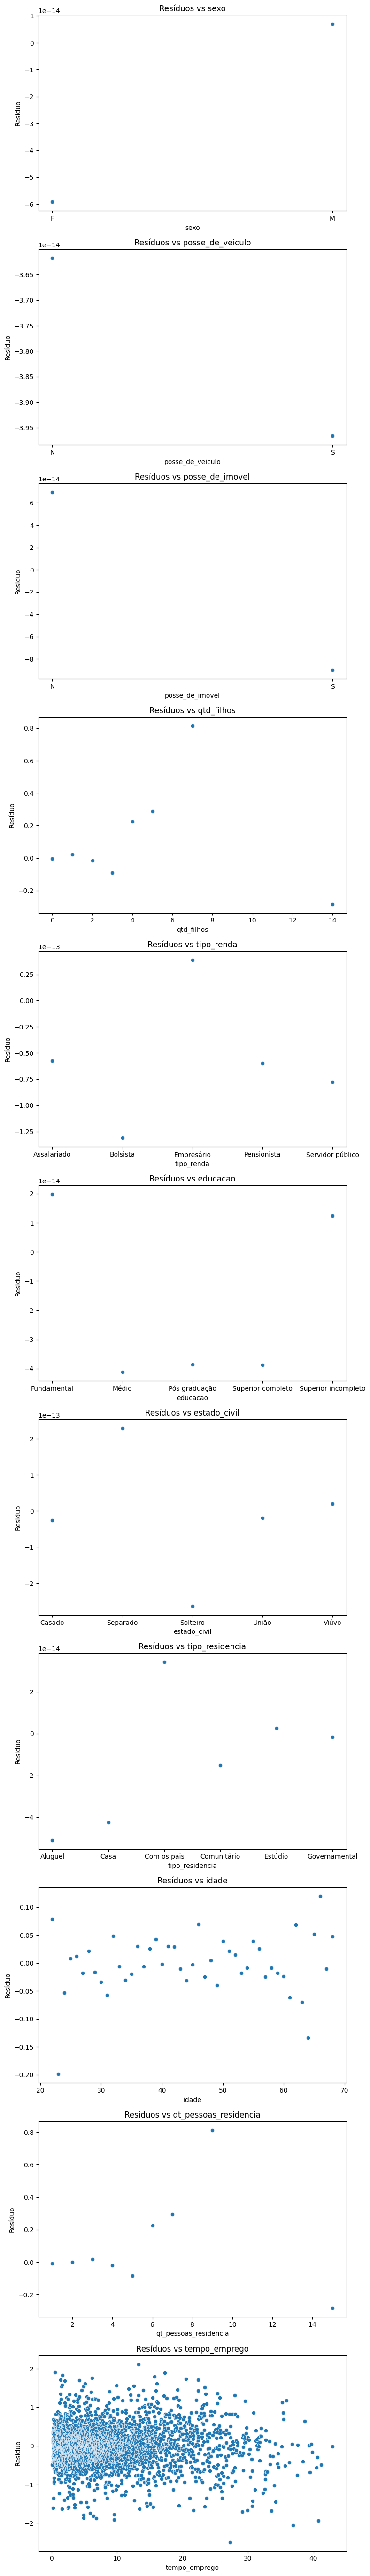

CPU times: total: 8.25 s
Wall time: 9.85 s


In [12]:
%%time
# padrões dos resíduos versus cada uma das variáveis do modelo
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 
             'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 
             'idade', 'qt_pessoas_residencia', 'tempo_emprego']


fig, axes = plt.subplots(nrows=len(variaveis), ncols=1, figsize=(8, len(variaveis) * 5))

for i, var in enumerate(variaveis):
    residuos_var = pd.DataFrame({
        var: df[var],
        'residuo': modelo_log.resid
    }).groupby(var).mean().reset_index()
    
    sns.scatterplot(data=residuos_var, x=var, y='residuo', ax=axes[i])
    axes[i].set_title(f'Resíduos vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Resíduo')

plt.tight_layout()
plt.show()

In [13]:
%%time
# valor médio dos resíduos aparenta ter relação com o mês de referência
residuos_por_mes = pd.DataFrame({
    'mes_ref': df['mes_ref'],
    'residuo': modelo_log.resid
}).groupby('mes_ref').mean()

residuos_por_mes.head()

CPU times: total: 359 ms
Wall time: 401 ms


,residuo
mes_ref,
2015-01,-0.734495
2015-02,-0.443283
2015-03,-0.091795
2015-04,0.291486
2015-05,0.635708


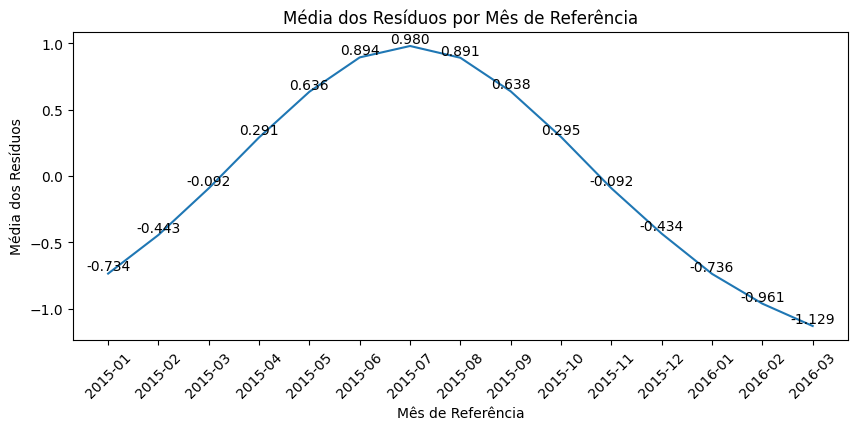

In [22]:
plt.figure(figsize=(10, 4))
ax = sns.lineplot(x=residuos_por_mes.index.astype(str), y=residuos_por_mes['residuo'])

for i, valor in enumerate(residuos_por_mes['residuo']):
    plt.text(x=i, y=valor, s=f"{valor:.3f}", fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Média dos Resíduos por Mês de Referência')
plt.xlabel('Mês de Referência')
plt.ylabel('Média dos Resíduos')
plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

Número de outliers identificados: 717
        studentized_residuals
740726              -3.080088
711736              -3.199558
32540               -3.251158
284711               3.053186
617235              -3.227304
...                       ...
595376              -3.041562
623502              -3.219732
344866               3.559414
388612               3.008349
281570               3.067526

[717 rows x 1 columns]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


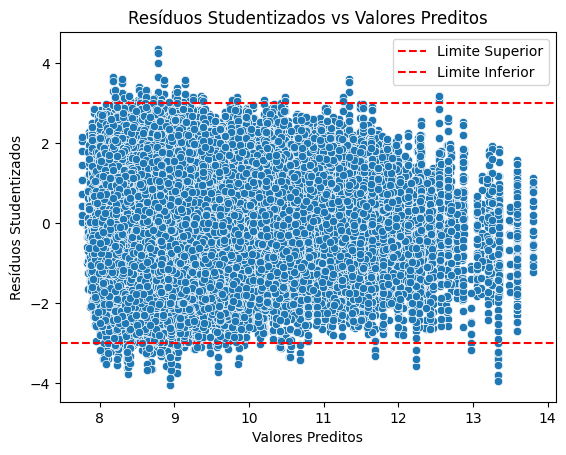

CPU times: total: 9.22 s
Wall time: 10.4 s


In [15]:
%%time
# código tutor
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Criar um objeto para calcular influências

influence = OLSInfluence(modelo_log)

# Resíduos studentizados

df_train['studentized_residuals'] = influence.resid_studentized_internal

# Visualizar outliers

outliers = df_train[np.abs(df_train['studentized_residuals']) > 3]

print(f"Número de outliers identificados: {len(outliers)}")

print(outliers[['studentized_residuals']])

df_train['valores_preditos'] = modelo_log.fittedvalues

# Plot dos resíduos studentizados

sns.scatterplot(x=df_train['valores_preditos'], y=df_train['studentized_residuals'])

plt.axhline(y=3, color='r', linestyle='--', label='Limite Superior')

plt.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior')

plt.title('Resíduos Studentizados vs Valores Preditos')

plt.xlabel('Valores Preditos')

plt.ylabel('Resíduos Studentizados')

plt.legend()

plt.show()

**Avaliação dos Resíduos:**
A dispersão dos resíduos não parece ter um padrão claro, acredito que a suposição de homocedasticidade esteja sendo atendida. Foi identificado _717 outliers_.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [16]:
import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [17]:
%%time

colunas_excluir = ['index', 'data_ref', 'mes_ref']
df_dum = df.drop(columns=colunas_excluir)

colunas_numericas = df_dum.select_dtypes(include=['int64', 'float64']).columns
colunas_categoricas = df_dum.select_dtypes(include=['object']).columns

df_dum = pd.get_dummies(df_dum, columns=colunas_categoricas, drop_first=True)
df_dum = df_dum.astype({col: 'int' for col in df_dum.select_dtypes('bool').columns})

CPU times: total: 1.67 s
Wall time: 1.72 s


In [18]:
# correlação usando Spearman
df_dum.corr(method='spearman')

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
qtd_filhos,1.000000,-0.415151,-0.089260,0.828600,-0.019957,0.118979,0.120125,-0.014756,-0.014811,0.037554,...,0.035905,-0.011660,-0.129928,0.011926,-0.110355,-0.044221,0.043468,-0.006703,0.036230,0.003364
idade,-0.415151,1.000000,0.300547,-0.350006,0.107999,-0.215249,-0.166339,0.130489,0.016079,-0.177635,...,-0.154209,0.057186,-0.069353,-0.057369,0.214403,0.155365,-0.190445,-0.017949,-0.006899,0.011105
tempo_emprego,-0.089260,0.300547,1.000000,-0.058139,0.501354,-0.129391,-0.068625,0.015000,0.024004,-0.126725,...,-0.058476,0.001212,-0.045854,-0.021323,0.050502,0.069683,-0.089319,-0.039824,0.024903,0.007484
qt_pessoas_residencia,0.828600,-0.350006,-0.058139,1.000000,-0.008260,0.158574,0.173039,-0.018073,-0.004032,0.026716,...,0.020628,-0.263756,-0.486828,0.094172,-0.305468,-0.021624,0.026630,-0.003731,0.030513,-0.002589
renda,-0.019957,0.107999,0.501354,-0.008260,1.000000,-0.005485,-0.002209,0.062270,0.005812,0.006301,...,-0.027892,0.010882,-0.017494,-0.012135,-0.005246,0.033061,-0.040263,-0.016726,0.008651,-0.001235
sexo_M,0.118979,-0.215249,-0.129391,0.158574,-0.005485,1.000000,0.367430,-0.055353,-0.015648,0.016329,...,0.019476,-0.062220,-0.034315,-0.024862,-0.138822,-0.062660,0.053816,0.020366,0.053661,-0.021501
posse_de_veiculo_S,0.120125,-0.166339,-0.068625,0.173039,-0.002209,0.367430,1.000000,-0.025415,-0.017923,0.048871,...,0.018819,-0.076818,-0.081675,-0.035032,-0.092673,-0.021778,0.021771,0.028529,0.031273,-0.018888
posse_de_imovel_S,-0.014756,0.130489,0.015000,-0.018073,0.062270,-0.055353,-0.025415,1.000000,0.015692,-0.015162,...,-0.045805,-0.017151,0.004828,-0.033026,0.039389,0.202921,-0.157139,-0.020386,-0.038695,-0.121679
tipo_renda_Bolsista,-0.014811,0.016079,0.024004,-0.004032,0.005812,-0.015648,-0.017923,0.015692,1.000000,-0.012261,...,-0.004543,-0.005497,-0.008372,-0.006489,-0.004697,0.007528,-0.004834,-0.001486,-0.001917,-0.004033
tipo_renda_Empresário,0.037554,-0.177635,-0.126725,0.026716,0.006301,0.016329,0.048871,-0.015162,-0.012261,1.000000,...,0.047669,0.009147,0.038663,0.034765,-0.075567,-0.006180,0.013648,-0.021980,0.006813,-0.003677


In [19]:
%%time
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(3)

CPU times: total: 3min 33s
Wall time: 1min 53s


,VIF Factor,Feature
0,34.558,qtd_filhos
1,34.648,idade
2,3.702,tempo_emprego
3,241.531,qt_pessoas_residencia
4,1.369,renda
5,1.822,sexo_M
6,1.965,posse_de_veiculo_S
7,3.243,posse_de_imovel_S
8,1.004,tipo_renda_Bolsista
9,1.477,tipo_renda_Empresário


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [20]:
%%time
modelo_log_test = smf.ols(formula = formula_log, data = df_test).fit()

CPU times: total: 7.86 s
Wall time: 8.13 s


In [24]:
print('R² na base de teste e na base de treino:')
modelo_log_test.rsquared,modelo_log.rsquared

R² na base de teste e na base de treino:


(0.39306551410833035, 0.39340462915306174)